## <font color='red'> Code to find ground state of Schwinger model and show phase transition (pair creation) by varying bare mass. </font>

#### &copy; Abhijit Chakraborty

In [31]:
N = int(input('Enter number of lattice sites:'))

Enter number of lattice sites:4


In [32]:
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from numpy import linalg as LA

In [4]:
np.set_printoptions(suppress=True)

### Creating the basis (with both occupation number and spin)

In [5]:
# Dimension of the lattice Hilbert space

size = 2**N

In [33]:
# Function to create the staggered basis set for the lattice

def lattperm(n):
    size = 2**n
    binarr = [None]*size
    
    for i in range(size):
        binarr[i] = bin(i)[2:]
        l = len(binarr[i])
        if l<n:
            for j in range(n-l):
                binarr[i] = '0' + binarr[i]
        binarr[i] = list(map(int,list(binarr[i])))
        
    return binarr

In [34]:
# Creates the occupation number basis (Fock)

binarr = lattperm(N)

In [35]:
binarr

[[0, 0, 0, 0],
 [0, 0, 0, 1],
 [0, 0, 1, 0],
 [0, 0, 1, 1],
 [0, 1, 0, 0],
 [0, 1, 0, 1],
 [0, 1, 1, 0],
 [0, 1, 1, 1],
 [1, 0, 0, 0],
 [1, 0, 0, 1],
 [1, 0, 1, 0],
 [1, 0, 1, 1],
 [1, 1, 0, 0],
 [1, 1, 0, 1],
 [1, 1, 1, 0],
 [1, 1, 1, 1]]

In [36]:
# Function to create the spin basis for the staggered fermions

def lat_to_spin(arr):
    n = len(arr)
    spinarr = [[0]*N for _ in range(n)]
    for i in range(n):
        for j in range(N):
            if j%2==0:
                if arr[i][j] == 0:
                    spin = 1
                else:
                    spin = -1
            else:
                if arr[i][j] == 0:
                    spin = -1
                else:
                    spin = 1
            spinarr[i][j] = spin
    return spinarr

In [37]:
# Creates the lattice spin basis and print it

spinarr = lat_to_spin(binarr)
spinarr 

[[1, -1, 1, -1],
 [1, -1, 1, 1],
 [1, -1, -1, -1],
 [1, -1, -1, 1],
 [1, 1, 1, -1],
 [1, 1, 1, 1],
 [1, 1, -1, -1],
 [1, 1, -1, 1],
 [-1, -1, 1, -1],
 [-1, -1, 1, 1],
 [-1, -1, -1, -1],
 [-1, -1, -1, 1],
 [-1, 1, 1, -1],
 [-1, 1, 1, 1],
 [-1, 1, -1, -1],
 [-1, 1, -1, 1]]

### Defining the Hamiltonian terms

In [10]:
# This is the mass term

def hamiltonianM(m,spinstr):
    eng = 0
    for i in range(1,N+1):
        
        if i%2==1:
            eng += -(m/2)*spinstr[i-1]
        else:
            eng += (m/2)*spinstr[i-1]
    
    return eng + m*N/2

In [11]:
# Checking the mass term values for m = 1.0

#for i in range(size):
#    print('Occupation: ', binarr[i], 'Energy: ', hamiltonianM(1.0,spinarr[i]))

In [12]:
# This is the other J-dependent term in H_Z

def HZJ(J,spinstr):
    tot = 0
    for n in range(1,N):
        sigma_z = 0
        if n%2 == 1:
            for j in range(n):
                sigma_z += spinstr[j]
        tot += sigma_z
        
    return tot*J/2.0

In [13]:
# Checking the values of the J-dependent terms in H_Z for J = 1.0

#for i in range(size):
#    print('Occupation: ', binarr[i], 'Energy: ', HZJ(1.0,spinarr[i]))

In [14]:
# This is the long-range correlation term

def corrHam(J,spinstr):
    tot = 0
    for n in range(1,N-1):
        for l in range (n+1,N):
            tot += J*(N-l)*spinstr[n-1]*spinstr[l-1]/2
    return tot

In [15]:
# Checking values for long range correlation term for J = 1.0

#for i in range(size):
#    print('Occupation: ', binarr[i], 'Energy: ', corrHam(1.0,spinarr[i]))

In [16]:
# Function to calculate the diagonal terms of the Hamiltonian matrix hmat

def energy_diag(m,J,spinarr,hmat):
    size = 2**N
    for i in range(size):
        hmat[i][i] = corrHam(J,spinarr[i]) + hamiltonianM(m,spinarr[i]) - HZJ(J,spinarr[i])
        
    return  

In [17]:
# Creates the Hamiltonian matrix with diagonal terms
#m = -10.0
#J = 1.0
#hmat = np.zeros((size,size))
#energy_diag(m,J,spinarr,hmat)

In [18]:
# Function to find index of non-zero off-diagonal terms for a given basis vector and n.

def find_off(spinarr,n,i):
    tempspin = list(spinarr[i])
    tempspin[n], tempspin[n+1] = tempspin[n+1], tempspin[n]
    j = spinarr.index(tempspin)
    
    return j

In [19]:
# Function to calculate the off-diagonal terms in the Hamiltonian

def flipflop(w,spinarr,hmat):
    
    for i in range(size):
        for j in range(N-1):
            if spinarr[i][j]*spinarr[i][j+1]==-1:
                ind = find_off(spinarr,j,i)
                hmat[i][ind] = w
    return

In [20]:
# Checking the off-diagonal terms for w = 1.0
#w = 1.0
#flipflop(w,spinarr,hmat)

### Finding the ground state

In [21]:
# Function to return the ground state energy and the ground state wavefunction for a given Hamiltonian

def ground_state(hmat):
    w, v = LA.eig(hmat)
    min_eig = min(w)
    ind = np.where(w==min_eig)[0][0]
    
    return min_eig, v[:,ind]

In [22]:
# Find the ground state energy and the corresponding wavefunction.

#eig, vec = LA.eig(hmat)

In [23]:
# Uncomment to print the ground state energy and the corresponding wavefunction.

#print(eig)
#print(vec)

In [24]:
#uncomment to print the hamiltonian

#hmat

### Order parameter

In [25]:
# Function to define the order parameter (observable).

def order_param(spinstr):
    tot = 0.0
    for i in range(N):
        if (i+1)%2==0:
            fterm = 1 + spinstr[i]
        else:    
            fterm = 1 - spinstr[i]
        for j in range(i+1,N):
            if (j+1)%2==0:
                sterm = 1 + spinstr[j]
            else:    
                sterm = 1 - spinstr[j] 
            tot += fterm*sterm
            
    return tot/(2*N*(N-1))

In [26]:
# Uncomment to check the value of the order parameter for the basis vectors.

#for i in range(size):
#    print('Order parameter = ', order_param(spinarr[i]), '\t','Spin Config = ', spinarr[i] )

In [27]:
# Creating the array with different values of m

mvals = np.linspace(-5,5,num=200)

## Finding the order parameter for the ground state and plotting the phase transition

In [28]:
# Evaluate the ground state of Hamiltonian matrix as function of m and calculate expectation value of order parameter.

order_list = []
occupation_list = []
for m in mvals:
    w = 1.0
    J = 1.0
    hmat = np.zeros((size,size))
    energy_diag(m,J,spinarr,hmat)
    flipflop(w,spinarr,hmat)
    eig, vec = ground_state(hmat)
    #print(vec)
    tot = 0.0
    occ = 0.0
    for i in range(size):
        tot += order_param(spinarr[i])*vec[i]*vec[i]
        occ += sum(binarr[i])*vec[i]*vec[i]
    order_list.append(tot) 
    occupation_list.append(occ)

Text(0, 0.5, 'Order parameter')

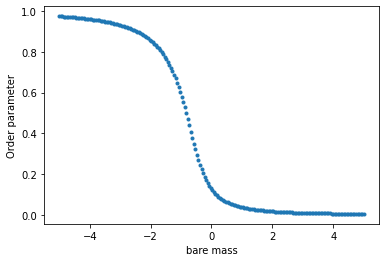

In [40]:
plt.plot(mvals,order_list,'.')
plt.xlabel('bare mass')
plt.ylabel('Order parameter')

### Plotting the occupation number

Text(0, 0.5, 'Occupation Number')

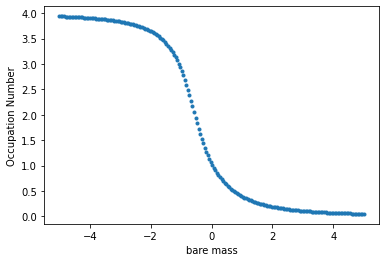

In [30]:
plt.plot(mvals,occupation_list,'.')
plt.xlabel('bare mass')
plt.ylabel('Occupation Number')

In [41]:
spinarr

[[1, -1, 1, -1],
 [1, -1, 1, 1],
 [1, -1, -1, -1],
 [1, -1, -1, 1],
 [1, 1, 1, -1],
 [1, 1, 1, 1],
 [1, 1, -1, -1],
 [1, 1, -1, 1],
 [-1, -1, 1, -1],
 [-1, -1, 1, 1],
 [-1, -1, -1, -1],
 [-1, -1, -1, 1],
 [-1, 1, 1, -1],
 [-1, 1, 1, 1],
 [-1, 1, -1, -1],
 [-1, 1, -1, 1]]